In [1]:
import pandas as pd
import pandas as pd    
import numpy as np
import matplotlib
from matplotlib import pylab as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder, LabelEncoder
from sklearn.feature_selection import mutual_info_classif,SelectKBest
from sklearn.impute import SimpleImputer

In [2]:
# read in datasets
df1 = pd.read_csv('../data/application_record.csv')
df2 = pd.read_csv('../data/credit_record.csv')

# brief view of these two datasets

In [3]:
# check the dataset
df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0


In [4]:
df1.shape

(438557, 18)

In [5]:
df2.head()

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C


In [6]:
df2.shape

(1048575, 3)

In [7]:
# select the first month of each id as a df3
df3 = pd.DataFrame(df2.groupby(["ID"])["MONTHS_BALANCE"].agg(min))

In [8]:
# provide month balance information in df3 to df1
new_df1 = df1.merge(df3,how='left',on='ID')

In [9]:
new_df1.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0


In [10]:
# identify client overdue for 60 days as risk customer
def risk(status):
    if status in ['2','3','4','5']:
        return 1
    else:
        return 0
df2['INDEX'] = df2['STATUS'].apply(risk)

In [11]:
# sum up the risk of each client to identify them as risk client
# identify 1 if they are high-risk and 0 if little risk
def risky(risksum):
    if risksum == 0:
        return 0
    else:
        return 1
risk = df2.groupby('ID').sum()
risk['RISK'] = risk['INDEX'].apply(risky)

In [12]:
# merge new df1 with risk
df = new_df1.merge(risk['RISK'],how='inner',on='ID')

In [13]:
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,RISK
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-15.0,0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0,-14.0,0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0,-29.0,0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-4.0,0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0,-26.0,0


In [14]:
df.shape

(36457, 20)

In [15]:
df.dtypes

ID                       int64
CODE_GENDER             object
FLAG_OWN_CAR            object
FLAG_OWN_REALTY         object
CNT_CHILDREN             int64
AMT_INCOME_TOTAL       float64
NAME_INCOME_TYPE        object
NAME_EDUCATION_TYPE     object
NAME_FAMILY_STATUS      object
NAME_HOUSING_TYPE       object
DAYS_BIRTH               int64
DAYS_EMPLOYED            int64
FLAG_MOBIL               int64
FLAG_WORK_PHONE          int64
FLAG_PHONE               int64
FLAG_EMAIL               int64
OCCUPATION_TYPE         object
CNT_FAM_MEMBERS        float64
MONTHS_BALANCE         float64
RISK                     int64
dtype: object

# Exploratory Data Analysis

In [16]:
# classify columns into continuous and categorical variables
# ignore ID because it is just for identification
conti = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']
cato = ['CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 
        'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'FLAG_MOBIL', 
        'FLAG_WORK_PHONE', 'FLAG_PHONE', 'FLAG_EMAIL', 
        'OCCUPATION_TYPE', 'MONTHS_BALANCE', 
       'RISK']

## figures of each columns

CODE_GENDER  data describtion:
F    24430
M    12027
Name: CODE_GENDER, dtype: int64


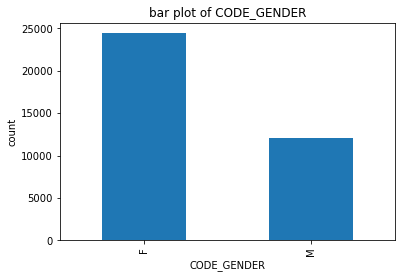

FLAG_OWN_CAR  data describtion:
N    22614
Y    13843
Name: FLAG_OWN_CAR, dtype: int64


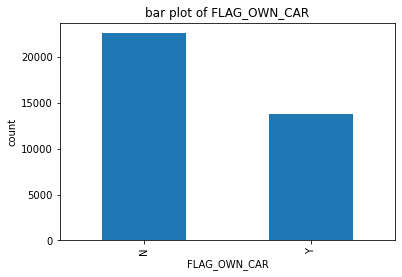

FLAG_OWN_REALTY  data describtion:
Y    24506
N    11951
Name: FLAG_OWN_REALTY, dtype: int64


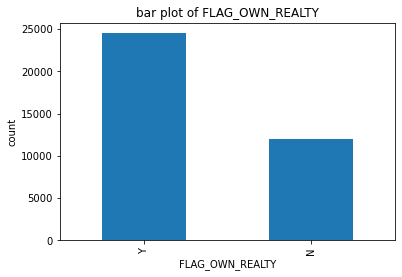

CNT_CHILDREN  data describtion:
count    36457.000000
mean         0.430315
std          0.742367
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max         19.000000
Name: CNT_CHILDREN, dtype: float64


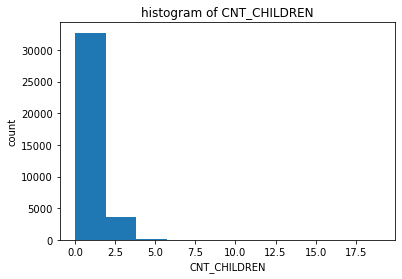

AMT_INCOME_TOTAL  data describtion:
count    3.645700e+04
mean     1.866857e+05
std      1.017892e+05
min      2.700000e+04
25%      1.215000e+05
50%      1.575000e+05
75%      2.250000e+05
max      1.575000e+06
Name: AMT_INCOME_TOTAL, dtype: float64


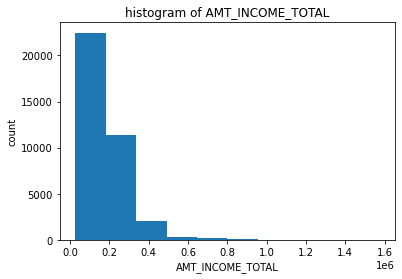

NAME_INCOME_TYPE  data describtion:
Working                 18819
Commercial associate     8490
Pensioner                6152
State servant            2985
Student                    11
Name: NAME_INCOME_TYPE, dtype: int64


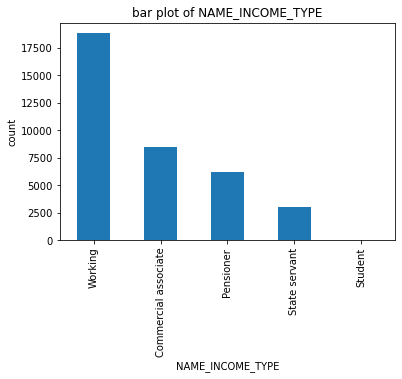

NAME_EDUCATION_TYPE  data describtion:
Secondary / secondary special    24777
Higher education                  9864
Incomplete higher                 1410
Lower secondary                    374
Academic degree                     32
Name: NAME_EDUCATION_TYPE, dtype: int64


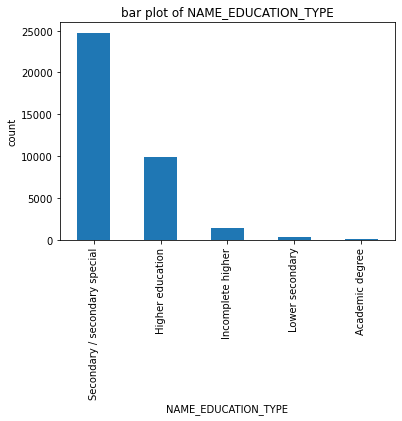

NAME_FAMILY_STATUS  data describtion:
Married                 25048
Single / not married     4829
Civil marriage           2945
Separated                2103
Widow                    1532
Name: NAME_FAMILY_STATUS, dtype: int64


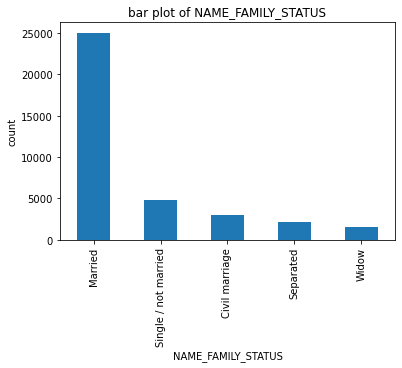

NAME_HOUSING_TYPE  data describtion:
House / apartment      32548
With parents            1776
Municipal apartment     1128
Rented apartment         575
Office apartment         262
Co-op apartment          168
Name: NAME_HOUSING_TYPE, dtype: int64


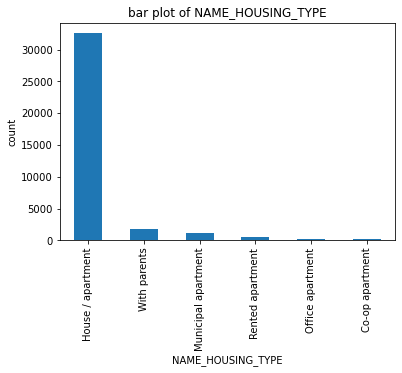

DAYS_BIRTH  data describtion:
count    36457.000000
mean    -15975.173382
std       4200.549944
min     -25152.000000
25%     -19438.000000
50%     -15563.000000
75%     -12462.000000
max      -7489.000000
Name: DAYS_BIRTH, dtype: float64


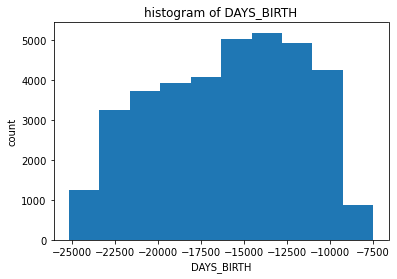

DAYS_EMPLOYED  data describtion:
count     36457.000000
mean      59262.935568
std      137651.334859
min      -15713.000000
25%       -3153.000000
50%       -1552.000000
75%        -408.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64


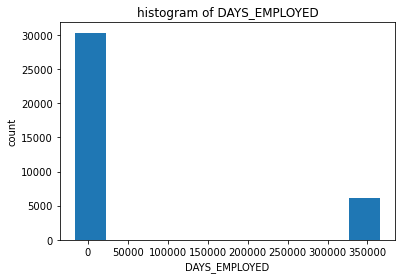

FLAG_MOBIL  data describtion:
1    36457
Name: FLAG_MOBIL, dtype: int64


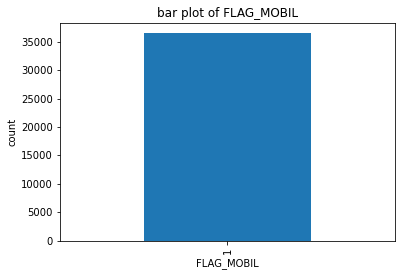

FLAG_WORK_PHONE  data describtion:
0    28235
1     8222
Name: FLAG_WORK_PHONE, dtype: int64


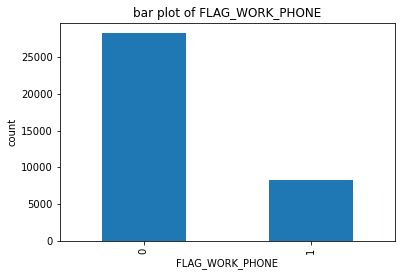

FLAG_PHONE  data describtion:
0    25709
1    10748
Name: FLAG_PHONE, dtype: int64


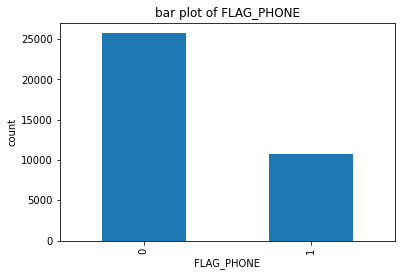

FLAG_EMAIL  data describtion:
0    33186
1     3271
Name: FLAG_EMAIL, dtype: int64


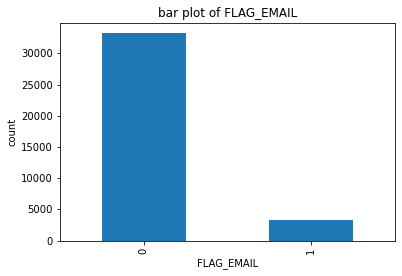

OCCUPATION_TYPE  data describtion:
Laborers                 6211
Core staff               3591
Sales staff              3485
Managers                 3012
Drivers                  2138
High skill tech staff    1383
Accountants              1241
Medicine staff           1207
Cooking staff             655
Security staff            592
Cleaning staff            551
Private service staff     344
Low-skill Laborers        175
Waiters/barmen staff      174
Secretaries               151
HR staff                   85
Realty agents              79
IT staff                   60
Name: OCCUPATION_TYPE, dtype: int64


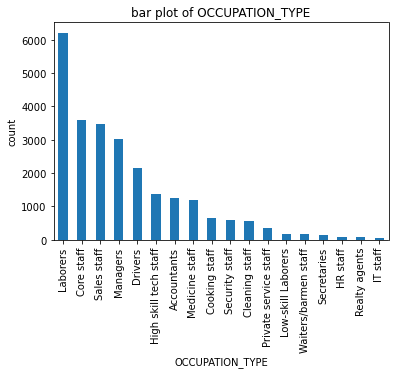

CNT_FAM_MEMBERS  data describtion:
count    36457.000000
mean         2.198453
std          0.911686
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max         20.000000
Name: CNT_FAM_MEMBERS, dtype: float64


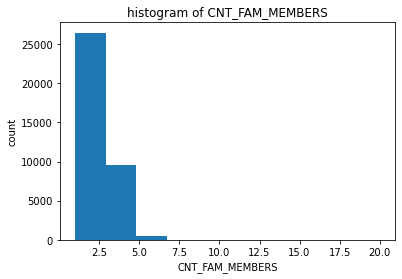

MONTHS_BALANCE  data describtion:
-7.0     889
-11.0    828
-6.0     824
-8.0     820
-5.0     816
        ... 
-58.0    333
-60.0    321
 0.0     315
-59.0    307
-57.0    304
Name: MONTHS_BALANCE, Length: 61, dtype: int64


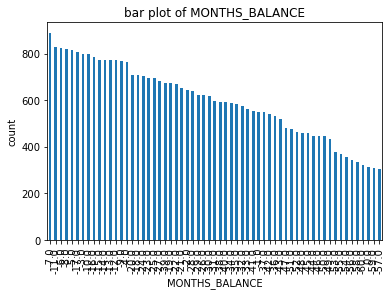

RISK  data describtion:
0    35841
1      616
Name: RISK, dtype: int64


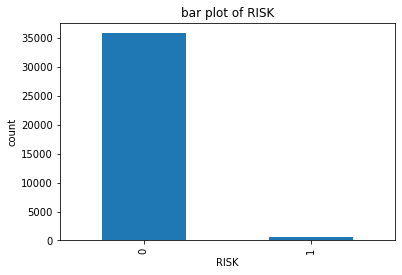

In [17]:
for column in df.columns:
    if column in conti:
        print(column, " data describtion:")
        print(df[column].describe())
        df[column].plot.hist(bins=10)
        plt.title('histogram of ' + column)
        plt.xlabel(column)
        plt.ylabel('count')
        plt.savefig('../figures/' + column + '.png')
        plt.show()
    if column in cato:
        print(column, " data describtion:")
        print(df[column].value_counts())
        pd.value_counts(df[column]).plot.bar()
        plt.title('bar plot of ' + column)
        plt.ylabel('count')
        plt.xlabel(column)
        plt.savefig('../figures/' + column + '.png')
        plt.show()

## figures of two columns

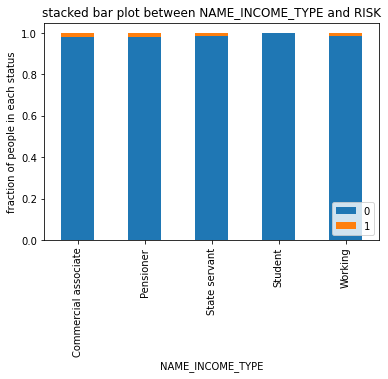

In [18]:
# stacked bar plot between NAME_INCOME_TYPE and RISK
count_matrix = df.groupby(['NAME_INCOME_TYPE', 'RISK']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title('stacked bar plot between NAME_INCOME_TYPE and RISK')
plt.ylabel('fraction of people in each status')
plt.legend(loc=4)
plt.savefig('../figures/NAME_INCOME_TYPE and RISK.pdf')
plt.show()

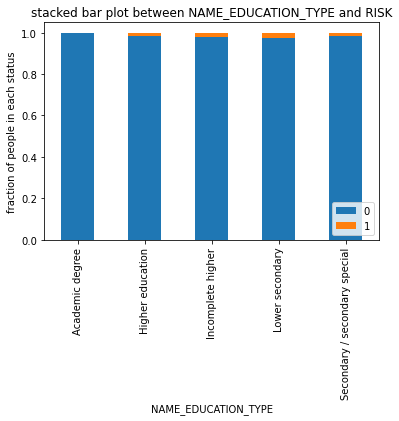

In [19]:
# stacked bar plot between NAME_EDUCATION_TYPE and RISK
count_matrix = df.groupby(['NAME_EDUCATION_TYPE', 'RISK']).size().unstack()
count_matrix_norm = count_matrix.div(count_matrix.sum(axis=1),axis=0)
count_matrix_norm.plot(kind='bar', stacked=True)
plt.title('stacked bar plot between NAME_EDUCATION_TYPE and RISK')
plt.ylabel('fraction of people in each status')
plt.legend(loc=4)
plt.savefig('../figures/NAME_EDUCATION_TYPE and RISK.png')
plt.show()

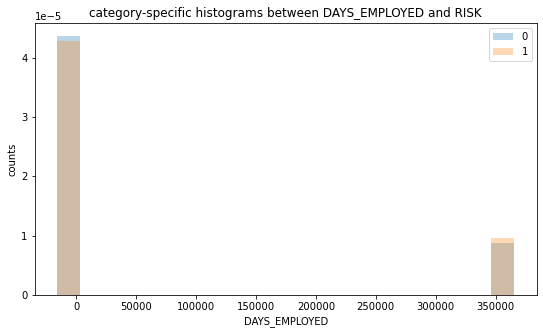

In [20]:
# category-specific histograms between DAYS_EMPLOYED and RISK
plt.figure(figsize = (9,5))
categories = df['RISK'].unique()
bin_range = (df['DAYS_EMPLOYED'].min(),df['DAYS_EMPLOYED'].max())
for c in categories:
    plt.hist(df[df['RISK']==c]['DAYS_EMPLOYED'],alpha=0.3,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('category-specific histograms between DAYS_EMPLOYED and RISK')
plt.ylabel('counts')
plt.xlabel('DAYS_EMPLOYED')
plt.savefig('../figures/DAYS_EMPLOYED and RISK.png')
plt.show()


<Figure size 720x720 with 0 Axes>

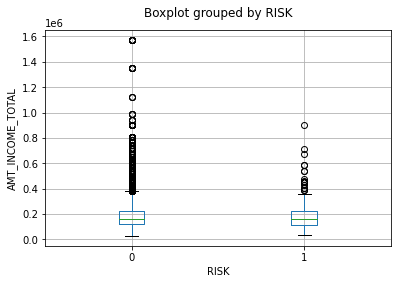

In [21]:
# box plot between AMT_INCOME_TOTAL and RISK
plt.figure(figsize=(10,10))
df[['AMT_INCOME_TOTAL','RISK']].boxplot(by='RISK')
plt.title('')
plt.ylabel('AMT_INCOME_TOTAL')
plt.xlabel('RISK')
plt.savefig('../figures/AMT_INCOME_TOTAL and RISK.png')
plt.show()

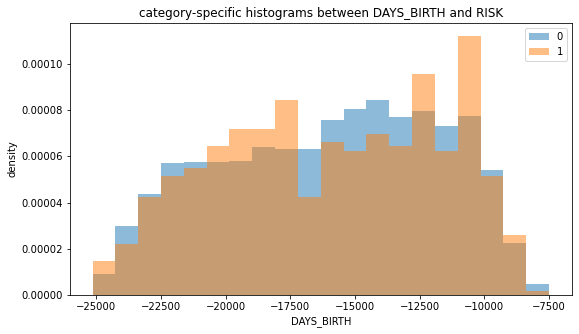

In [22]:
# category-specific histograms between DAYS_BIRTH and RISK
plt.figure(figsize = (9,5))
categories = df['RISK'].unique()
bin_range = (df['DAYS_BIRTH'].min(),df['DAYS_BIRTH'].max())
for c in categories:
    plt.hist(df[df['RISK']==c]['DAYS_BIRTH'],alpha=0.5,label=c,range=bin_range,bins=20,density=True)
plt.legend()
plt.title('category-specific histograms between DAYS_BIRTH and RISK')
plt.ylabel('density')
plt.xlabel('DAYS_BIRTH')
plt.savefig('../figures/DAYS_BIRTH and RISK.png')
plt.show()

## scatter matrix

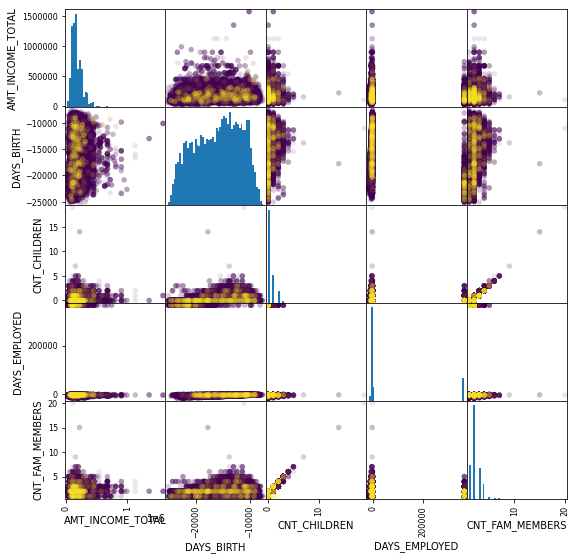

In [23]:
pd.plotting.scatter_matrix(df[['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'CNT_CHILDREN', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS']],figsize=(9, 9), marker='o',hist_kwds={'bins': 50}, 
                           s=30, alpha=.1, c = df['RISK']) 

plt.savefig('../figures/scatter_matrix.png', dpi = 300)

# Data preprocessing

In [24]:
X = df.drop('RISK',axis=1)
y = df['RISK']

## train test split

In [25]:
# IID and imbalanced dataset split, use stratified and k-fold
random_state = 42

# stratified train-test split
X_other, X_test, y_other, y_test = train_test_split(X,y,test_size = 0.2,stratify=y,random_state=random_state)

# do StratifiedKFold split on other
kf = StratifiedKFold(n_splits=4,shuffle=True,random_state=random_state)
for train_index, val_index in kf.split(X_other,y_other):
    X_train = X_other.iloc[train_index]
    y_train = y_other.iloc[train_index]
    X_val = X_other.iloc[val_index]
    y_val = y_other.iloc[val_index]


In [26]:
X_train.shape

(21874, 19)

In [27]:
X_val.shape

(7291, 19)

In [28]:
X_test.shape

(7292, 19)

## preprocessing data

### handle missing values

In [29]:
# check missing values
df.isnull().sum(axis=0)/df.shape[0]

ID                     0.000000
CODE_GENDER            0.000000
FLAG_OWN_CAR           0.000000
FLAG_OWN_REALTY        0.000000
CNT_CHILDREN           0.000000
AMT_INCOME_TOTAL       0.000000
NAME_INCOME_TYPE       0.000000
NAME_EDUCATION_TYPE    0.000000
NAME_FAMILY_STATUS     0.000000
NAME_HOUSING_TYPE      0.000000
DAYS_BIRTH             0.000000
DAYS_EMPLOYED          0.000000
FLAG_MOBIL             0.000000
FLAG_WORK_PHONE        0.000000
FLAG_PHONE             0.000000
FLAG_EMAIL             0.000000
OCCUPATION_TYPE        0.310585
CNT_FAM_MEMBERS        0.000000
MONTHS_BALANCE         0.000000
RISK                   0.000000
dtype: float64

The only missing value is OCCUPATION_TYPE, which is a categorical variable. About 30% of it is missing, so they cannot be dropped directly. Treat them as another category

### transform variables

In [30]:
ordinal_ftrs = ['FLAG_OWN_CAR','FLAG_OWN_REALTY','NAME_EDUCATION_TYPE'] 
ordinal_cats = [['N','Y'],['N','Y'],['Lower secondary','Secondary / secondary special',
                                    'Incomplete higher','Higher education','Academic degree']]
onehot_ftrs = ['CODE_GENDER','NAME_INCOME_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE','FLAG_MOBIL', 
              'FLAG_WORK_PHONE', 'FLAG_PHONE','FLAG_EMAIL','OCCUPATION_TYPE',]
std_ftrs = ['CNT_CHILDREN','AMT_INCOME_TOTAL','DAYS_BIRTH','DAYS_EMPLOYED','CNT_FAM_MEMBERS','MONTHS_BALANCE']


In [31]:
# build preprocessor

# one-hot encoder
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant',fill_value='missing')),
    ('onehot', OneHotEncoder(sparse=False,handle_unknown='ignore'))])

# ordinal encoder
ordinal_transformer = Pipeline(steps=[
    ('imputer2', SimpleImputer(strategy='constant',fill_value='NA')),
    ('ordinal', OrdinalEncoder(categories = ordinal_cats))])

# standard scaler
standard_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# collect the transformers
preprocessor = ColumnTransformer(
    transformers=[
        ('std', standard_transformer, std_ftrs),
        ('cat', categorical_transformer, onehot_ftrs),
        ('ord', ordinal_transformer, ordinal_ftrs)])

In [32]:
clf = Pipeline(steps=[('preprocessor', preprocessor)]) 

In [33]:
# fit and transform
X_train_prep = clf.fit_transform(X_train)
X_val_prep = clf.transform(X_val)
X_test_prep = clf.transform(X_test)

In [34]:
# transform target value
le = LabelEncoder()
y_train_prep = le.fit_transform(y_train)
y_val_prep = le.transform(y_val)
y_test_prep = le.transform(y_test)

### feature selection

In [35]:
# non-linear classification
mi = mutual_info_classif(X_train_prep, y_train_prep)

In [36]:
mi.sort()
mi

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       1.50720877e-05, 5.88550993e-05, 9.51511150e-05, 9.67930711e-05,
       1.09280569e-04, 3.07641671e-04, 3.73903519e-04, 4.06167157e-04,
       4.11766827e-04, 4.39453785e-04, 5.04939449e-04, 6.23969641e-04,
       6.76218397e-04, 7.07209487e-04, 7.14922078e-04, 9.99405217e-04,
       1.08481408e-03, 1.08652661e-03, 1.11940343e-03, 1.38322991e-03,
       1.40445620e-03, 1.53968858e-03, 1.60019232e-03, 1.75856988e-03,
       2.09875845e-03, 2.32061582e-03, 2.42456009e-03, 2.52574984e-03,
       2.53916357e-03, 3.23234489e-03, 3.60320955e-03, 4.06382684e-03,
       4.92587878e-03, 5.07911226e-03, 6.05957382e-03, 8.10016338e-03,
       1.19314532e-02])

In [37]:
# select 35 best features
f_select = SelectKBest(mutual_info_classif,k=35)
X_train_f = f_select.fit_transform(X_train_prep, y_train_prep)
X_test_f = f_select.transform(X_test_prep)
X_val_f = f_select.transform(X_val_prep)

In [38]:
X_train_prep.shape

(21874, 53)

In [39]:
X_train_f.shape

(21874, 35)

In [40]:
X_test_f.shape

(7292, 35)

In [41]:
X_val_f.shape

(7291, 35)